# Data Cleaning with Obeseity data 

Data cleaning is such an integral part of data analysis.Unlike on Kaggle,almost all data you see in the real world would be dirty and messy. Some even say data cleaning would take 80% of data analysis time.

The very fisrt step of any given data analysis project would be getting to know your data especially when you are dealing a messy one.

So, lets clean this messy data to start our analysis

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Read and Know Your Data

Take a look at our data as below, the data is quite obscure,it's hard to understand for a human,not mentioned for a computer.in this kind of situation,you have ways to get acquaintance with your data as follows:

1. Go to the data source page [WHO OBESITY DATA](https://apps.who.int/gho/data/node.main.A900A?lang=en)
2. If solution 1 doesn not work or hard to do, you can always go to ask data curator directly.

In [2]:
data= pd.read_csv('../data/data.csv')

In [3]:
data.head(5)

,Unnamed: 0,2016,2016.1,2016.2,2015,2015.1,2015.2,2014,2014.1,2014.2,...,1978.2,1977,1977.1,1977.2,1976,1976.1,1976.2,1975,1975.1,1975.2
0,NaN,"Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...",...,"Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great..."
1,NaN,18+ years,18+ years,18+ years,18+ years,18+ years,18+ years,18+ years,18+ years,18+ years,...,18+ years,18+ years,18+ years,18+ years,18+ years,18+ years,18+ years,18+ years,18+ years,18+ years
2,Country,Both sexes,Male,Female,Both sexes,Male,Female,Both sexes,Male,Female,...,Female,Both sexes,Male,Female,Both sexes,Male,Female,Both sexes,Male,Female
3,Afghanistan,5.5 [3.4-8.1],3.2 [1.3-6.4],7.6 [4.3-12.4],5.2 [3.3-7.7],3.0 [1.3-6.0],7.3 [4.1-11.8],4.9 [3.1-7.3],2.8 [1.2-5.6],7.0 [4.0-11.3],...,0.9 [0.3-2.2],0.6 [0.2-1.2],0.2 [0.0-0.7],0.9 [0.3-2.1],0.5 [0.2-1.1],0.2 [0.0-0.7],0.8 [0.2-2.0],0.5 [0.2-1.1],0.2 [0.0-0.6],0.8 [0.2-2.0]
4,Albania,21.7 [17.0-26.7],21.6 [14.8-29.0],21.8 [15.3-28.9],21.1 [16.6-26.0],20.9 [14.4-28.1],21.3 [15.1-28.1],20.5 [16.2-25.1],20.2 [13.9-27.3],20.8 [14.9-27.4],...,9.1 [4.6-15.5],6.8 [4.0-10.7],4.8 [2.0-9.3],8.9 [4.3-15.4],6.7 [3.8-10.6],4.6 [1.8-9.2],8.8 [4.1-15.4],6.5 [3.6-10.5],4.4 [1.7-9.2],8.6 [3.9-15.4]


In [4]:
df=data.copy()

## Why and how the data is messy?

In most cases, data is collected by human or machines,a tiny glich would cause a long strip of bad data.if the data is collected by human, then it is a big chance that it would be messy. data can be dirty in many different ways,but mostly fall into those categories :

1. Missing data : like NAN
2. Validity of data : like 2016.1 / 2016.2 in the column
3. Outliers : like if a BMI entry is greater than 100
4. Consistency of data : the unit of every entry is not the same
5. Correctness of data: we are not gonna go through this ,but it is an important part of doing analysis in bussiness world, basically you need external data source or database to cross check the data in your hand because as we always say:

You dont know what you dont know

6. Data is in wide form not in long form : we are gonna go deeper about this one.

Are you ready, it's time to get our hands dirt

## long form VS wide form

The original data we have here is in wide form which means the form is very wide literally.

The .1 .2 in year number stand for gender, we gonna fix that later.

Wide data is not easy to analyze or stored effectively in computer, so we want to change it as soon as we can. go to read this tidy-data if you want to know more.



### Rename the columns appropriately and unpivot the data in the desirable format using pandas melt().

In [5]:

df.drop([0,1,2],inplace=True)

In [6]:
df.rename(columns={'Unnamed: 0':'country'},inplace=True)

In [7]:
df.head()

,country,2016,2016.1,2016.2,2015,2015.1,2015.2,2014,2014.1,2014.2,...,1978.2,1977,1977.1,1977.2,1976,1976.1,1976.2,1975,1975.1,1975.2
3,Afghanistan,5.5 [3.4-8.1],3.2 [1.3-6.4],7.6 [4.3-12.4],5.2 [3.3-7.7],3.0 [1.3-6.0],7.3 [4.1-11.8],4.9 [3.1-7.3],2.8 [1.2-5.6],7.0 [4.0-11.3],...,0.9 [0.3-2.2],0.6 [0.2-1.2],0.2 [0.0-0.7],0.9 [0.3-2.1],0.5 [0.2-1.1],0.2 [0.0-0.7],0.8 [0.2-2.0],0.5 [0.2-1.1],0.2 [0.0-0.6],0.8 [0.2-2.0]
4,Albania,21.7 [17.0-26.7],21.6 [14.8-29.0],21.8 [15.3-28.9],21.1 [16.6-26.0],20.9 [14.4-28.1],21.3 [15.1-28.1],20.5 [16.2-25.1],20.2 [13.9-27.3],20.8 [14.9-27.4],...,9.1 [4.6-15.5],6.8 [4.0-10.7],4.8 [2.0-9.3],8.9 [4.3-15.4],6.7 [3.8-10.6],4.6 [1.8-9.2],8.8 [4.1-15.4],6.5 [3.6-10.5],4.4 [1.7-9.2],8.6 [3.9-15.4]
5,Algeria,27.4 [22.5-32.7],19.9 [13.6-27.1],34.9 [27.6-42.7],26.7 [21.9-31.8],19.2 [13.2-26.1],34.2 [27.1-41.7],26.0 [21.4-30.9],18.5 [12.7-25.0],33.6 [26.7-40.7],...,11.8 [6.5-18.6],7.4 [4.3-11.3],3.1 [1.2-6.2],11.4 [6.2-18.4],7.2 [4.1-11.1],2.9 [1.1-6.1],11.1 [5.8-18.2],6.9 [3.9-10.9],2.8 [1.0-6.0],10.7 [5.5-18.0]
6,Andorra,25.6 [20.1-31.3],25.9 [18.0-34.3],25.3 [17.7-33.7],25.4 [20.1-31.0],25.5 [17.8-33.8],25.2 [17.7-33.4],25.2 [20.0-30.7],25.2 [17.6-33.3],25.1 [17.8-33.1],...,17.5 [10.9-25.3],14.0 [9.6-19.1],10.7 [5.6-17.4],16.9 [10.4-24.8],13.5 [9.1-18.6],10.2 [5.2-16.9],16.4 [9.8-24.4],12.9 [8.6-18.1],9.7 [4.7-16.3],15.8 [9.2-23.9]
7,Angola,8.2 [5.1-12.2],4.0 [1.6-7.9],12.1 [6.8-19.0],7.9 [4.9-11.7],3.8 [1.5-7.3],11.6 [6.5-18.2],7.5 [4.7-11.2],3.6 [1.4-6.9],11.1 [6.2-17.5],...,1.6 [0.5-3.7],0.9 [0.3-2.0],0.3 [0.0-0.9],1.5 [0.4-3.6],0.9 [0.3-2.0],0.3 [0.0-0.9],1.4 [0.4-3.5],0.8 [0.3-1.9],0.2 [0.0-0.8],1.4 [0.4-3.4]


In [8]:
df=df.melt(id_vars=['country'],var_name='year')

In [9]:
df.head()

,country,year,value
0,Afghanistan,2016,5.5 [3.4-8.1]
1,Albania,2016,21.7 [17.0-26.7]
2,Algeria,2016,27.4 [22.5-32.7]
3,Andorra,2016,25.6 [20.1-31.3]
4,Angola,2016,8.2 [5.1-12.2]


In [10]:
df[df['country']== 'India'].head(20)
#df[df.country=='India'].head(20)

,country,year,value
78,India,2016,3.9 [3.0-5.0]
273,India,2016.1,2.7 [1.7-4.0]
468,India,2016.2,5.1 [3.6-6.9]
663,India,2015,3.7 [2.9-4.7]
858,India,2015.1,2.6 [1.7-3.7]
1053,India,2015.2,4.8 [3.5-6.5]
1248,India,2014,3.5 [2.7-4.4]
1443,India,2014.1,2.4 [1.6-3.4]
1638,India,2014.2,4.6 [3.3-6.1]
1833,India,2013,3.3 [2.6-4.1]


## Correct the format

1. we will drop the first 3 row since its actually headers in the original forms.
2. correct year value
3. correct the gender value

In [11]:
df.dtypes

country    object
year       object
value      object
dtype: object

In [12]:
df.year.str.split('.')

0           [2016]
1           [2016]
2           [2016]
3           [2016]
4           [2016]
           ...    
24565    [1975, 2]
24566    [1975, 2]
24567    [1975, 2]
24568    [1975, 2]
24569    [1975, 2]
Name: year, Length: 24570, dtype: object

In [13]:
df.year.str.split('.', expand=True) # expand=True makes it a dataframe

,0,1
0,2016,None
1,2016,None
2,2016,None
3,2016,None
4,2016,None
...,...,...
24565,1975,2
24566,1975,2
24567,1975,2
24568,1975,2


In [14]:
df[['year','gender']] = df.year.str.split('.', expand=True)


In [15]:
df.head()

,country,year,value,gender
0,Afghanistan,2016,5.5 [3.4-8.1],None
1,Albania,2016,21.7 [17.0-26.7],None
2,Algeria,2016,27.4 [22.5-32.7],None
3,Andorra,2016,25.6 [20.1-31.3],None
4,Angola,2016,8.2 [5.1-12.2],None


In [16]:
df.gender.unique()

array([None, '1', '2'], dtype=object)

In [17]:
df['gender'] = df.gender.map({None:'Both', '1': 'Male', '2':'Female'})
df.head()

,country,year,value,gender
0,Afghanistan,2016,5.5 [3.4-8.1],Both
1,Albania,2016,21.7 [17.0-26.7],Both
2,Algeria,2016,27.4 [22.5-32.7],Both
3,Andorra,2016,25.6 [20.1-31.3],Both
4,Angola,2016,8.2 [5.1-12.2],Both


In [18]:
df.iloc[4]

country            Angola
year                 2016
value      8.2 [5.1-12.2]
gender               Both
Name: 4, dtype: object

## correct the BMI value columns

From the webpage of WHO we can know that the values in [] are actually estimation intervel，so we need to seperate them into 3 columns

you can use str.matach() or str.findall() with regular expression to extract float number in this field,but we are gonna use str.split()

Here i am using str.split() to extract float number in this field

In [19]:
# Renaming the value column to BMI
#df.rename(columns={'value':'BMI'},inplace=True)
#df1=df.copy()

In [20]:
#df1.head()

In [21]:
# Splitting the BMI value into BMI,upper and lower estimates
#df['BMI']=df1['BMI'].str.split('[',expand=True)[0]
#df['BMI']

In [22]:
#df['BMI']=df1['BMI'].str.split('[',expand=True)[0]
#df['BMI_lower']=df1['BMI'].str.split('[',expand=True)[1].str.split('-',expand=True)[0]
#df['BMI_upper']=df1['BMI'].str.split('[',expand=True)[1].str.split('-',expand=True)[1].str.split(']',expand=True)[0]
#df=df[['country','year','gender','BMI','BMI_upper','BMI_lower']] #reset the column sequence
#df.head()

Here i am using regular expression to extract float number in this field

In [23]:
df.value.str.findall('\d+\.\d+').tolist() #\d Returns a match where the string contains digits (numbers from 0-9)"\d"
                                             #\.Returns a match where the .. means floating point
                                               #\d* means any no of digit either 0 or unlimited.
                                               #\d+ means any no(more than 1) after decimal point(may be zero,or any number)

[['5.5', '3.4', '8.1'],
 ['21.7', '17.0', '26.7'],
 ['27.4', '22.5', '32.7'],
 ['25.6', '20.1', '31.3'],
 ['8.2', '5.1', '12.2'],
 ['18.9', '13.8', '24.6'],
 ['28.3', '23.4', '33.5'],
 ['20.2', '15.7', '24.8'],
 ['29.0', '25.3', '32.9'],
 ['20.1', '15.9', '24.6'],
 ['19.9', '15.3', '24.9'],
 ['31.6', '25.6', '37.8'],
 ['29.8', '24.6', '35.2'],
 ['3.6', '2.4', '5.1'],
 ['23.1', '18.3', '28.4'],
 ['24.5', '19.4', '30.0'],
 ['22.1', '18.6', '25.7'],
 ['24.1', '19.0', '29.8'],
 ['9.6', '7.0', '12.6'],
 ['6.4', '4.3', '9.0'],
 ['20.2', '15.4', '25.4'],
 ['17.9', '13.9', '22.3'],
 ['18.9', '14.6', '23.5'],
 ['22.1', '18.7', '25.7'],
 ['14.1', '10.5', '18.3'],
 ['25.0', '19.7', '30.5'],
 ['5.6', '3.9', '7.7'],
 ['5.4', '3.5', '7.9'],
 ['11.8', '8.4', '15.5'],
 ['3.9', '2.5', '5.6'],
 ['11.4', '8.6', '14.5'],
 ['29.4', '25.7', '33.3'],
 ['7.5', '4.8', '10.9'],
 ['6.1', '4.2', '8.5'],
 ['28.0', '23.4', '32.9'],
 ['6.2', '4.7', '7.9'],
 ['22.3', '18.5', '26.5'],
 ['7.8', '5.4', '10.7'],
 ['9.6',

In [24]:
pd.DataFrame(df.value.str.findall('\d+\.\d+').tolist())# series is converted to multiple columns using pandas.

,0,1,2,3,4,5
0,5.5,3.4,8.1,None,None,None
1,21.7,17.0,26.7,None,None,None
2,27.4,22.5,32.7,None,None,None
3,25.6,20.1,31.3,None,None,None
4,8.2,5.1,12.2,None,None,None
...,...,...,...,...,...,...
24565,13.2,7.1,20.7,None,None,None
24566,0.2,0.1,0.5,None,None,None
24567,4.2,1.5,8.9,None,None,None
24568,2.5,1.0,5.1,None,None,None


But it strange to get 6 columns. particularly 3,4,5 are literally dont know.Lets investigate where their is the glitch.

In [25]:
df.value.str.findall('\d+\.\d+').apply(len) # all have 3 strings

0        3
1        3
2        3
3        3
4        3
        ..
24565    3
24566    3
24567    3
24568    3
24569    3
Name: value, Length: 24570, dtype: int64

In [26]:
df.value.str.findall('\d+\.\d+').apply(len).ne(3).sum() #These are the columns which are having issues.

584

In [27]:
df.value.str.findall('\d+\.\d+').apply(len).value_counts()
# 504 countries have no data
# 80 countries have 2 entries. 

3    23986
0      504
6       80
Name: value, dtype: int64

In [28]:
df[['BMI','BMI_lower','BMI_upper']]=pd.DataFrame(df.value.str.findall('\d+\.\d+').tolist()).drop(columns=[3,4,5])
df.head()

,country,year,value,gender,BMI,BMI_lower,BMI_upper
0,Afghanistan,2016,5.5 [3.4-8.1],Both,5.5,3.4,8.1
1,Albania,2016,21.7 [17.0-26.7],Both,21.7,17.0,26.7
2,Algeria,2016,27.4 [22.5-32.7],Both,27.4,22.5,32.7
3,Andorra,2016,25.6 [20.1-31.3],Both,25.6,20.1,31.3
4,Angola,2016,8.2 [5.1-12.2],Both,8.2,5.1,12.2


In [29]:
df.shape

(24570, 7)

## Check validity of all columns or fields
We now have a pretty clean data compared to the one we just got. but our job is still not done yet. we need to go through every columns or fields to make sure the data is reletively correct.

**Country columns**

### What we know：

There is a country named country which need to be fixed

There are Nones in country column which need to be fixed

We have

### What we do：

We gonna drop those entries.

In [30]:
df.isna().sum()

country        0
year           0
value          0
gender         0
BMI          504
BMI_lower    504
BMI_upper    504
dtype: int64

In [31]:
df.shape

(24570, 7)

In [32]:
df.dtypes

country      object
year         object
value        object
gender       object
BMI          object
BMI_lower    object
BMI_upper    object
dtype: object

changing the dtypes of different features and dropping value column as it is not required

In [33]:
df.drop(columns=['value'],inplace=True)

In [34]:
df['year']=df['year'].astype('int')

In [35]:
df[['BMI','BMI_lower','BMI_upper']]=df[['BMI','BMI_lower','BMI_upper']].astype('float')

In [36]:
df.dtypes

country       object
year           int32
gender        object
BMI          float64
BMI_lower    float64
BMI_upper    float64
dtype: object

In [37]:
df.describe()

,year,BMI,BMI_lower,BMI_upper
count,24570.000000,24066.000000,24066.000000,24066.000000
mean,1995.500000,12.448932,9.237243,16.232112
std,12.121165,10.407428,8.854281,12.003078
min,1975.000000,0.100000,0.000000,0.200000
25%,1985.000000,3.900000,2.200000,6.300000
50%,1995.500000,10.600000,7.000000,14.800000
75%,2006.000000,18.175000,13.800000,23.000000
max,2016.000000,63.300000,55.600000,70.800000


## BMI \ BMI_upper_esti and BMI_lower_esti columns

### What we know：

1. 4 contries have no BMI data which are Monaca,Sudan,South Sudan and San Marino,hence they dont have estimations.
2. We have 191 countries that do have BMI data and each of them has 126 entries.
3. The descriptive statistics of BMI data seems OK, no outliers.

### What we do：

1. We gonna create a new dataframe without those 4 countries to analyze.
2. We gonna change the data type of BMI and estimations to float.

## Activity (15 minutes)

## Visualization and EDA
Before you doing any EDA, come up with some questions first. Question orientated is always a good way to explore a set of data, you could easily fall into rabbit holes you enconter along the process otherwise.

What question we could possibly answer through this data?

# what is BMI of Male in India?

<AxesSubplot:>

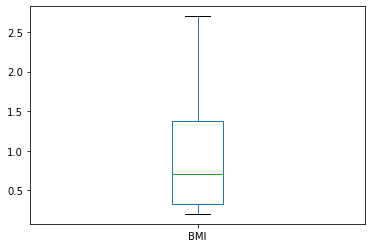

In [38]:
df.loc[(df['gender']=='Male') & (df['country']=='India'),'BMI'].plot.box()

# plot a line graph of BMI across the Years for female in India 

<AxesSubplot:title={'center':'Indian females avg. BMI over the last 42 years'}, xlabel='year'>

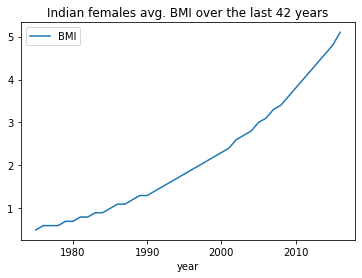

In [39]:

df.loc[(df['gender']=='Female') & (df['country']=='India'),['year','BMI']].plot.line(x='year',y='BMI', title='Indian females avg. BMI over the last 42 years')


# List of Top 10 countries having obesity(BMI>30)

In [40]:
avg_BMI_per_countries_over_year=df.loc[df.gender=='Both'].groupby('country').BMI.mean()

In [41]:
avg_BMI_per_countries_over_year[avg_BMI_per_countries_over_year.ge(30)].sort_values(ascending=False)

country
Nauru                               53.042857
Palau                               42.080952
Cook Islands                        41.816667
Marshall Islands                    40.454762
Tuvalu                              35.080952
Niue                                34.307143
Tonga                               33.885714
Samoa                               33.659524
Micronesia (Federated States of)    31.995238
Kiribati                            31.204762
Name: BMI, dtype: float64

# Avg BMI of India

In [42]:
avg_BMI_per_countries_over_year['India']

1.5452380952380953

# BMI trend of a particular country over the years

In [43]:
def BMI_trend(df, some_country='New Zeland'):
    """"""
    'generating BMI trend for a particular country'
    """"""
    sns.scatterplot(data=df[df.country==some_country],
                   x='year',
                   y='BMI',
                   hue='gender')
    plt.title(f'BMI Trend of{some_country}from{df.year.min()}-{df.year.max()}')
    plt.show()

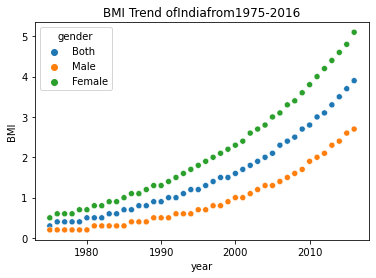

In [44]:
BMI_trend(df, some_country='India')

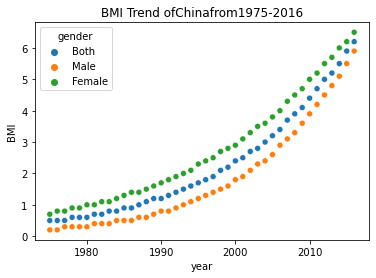

In [45]:
BMI_trend(df, some_country='China')

# TRY Bar Chart Race

In [46]:
!pip install bar_chart_race  # package is installed.

ERROR: Invalid requirement: '#'


In [47]:
!conda install -c conda-forge ffmpeg -y

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\PRANGYA PARAMITA\anaconda3

  added / updated specs:
    - ffmpeg


The following NEW packages will be INSTALLED:

  python_abi         conda-forge/win-64::python_abi-3.8-1_cp38

The following packages will be SUPERSEDED by a higher-priority channel:

  conda              pkgs/main::conda-4.10.1-py38haa95532_1 --> conda-forge::conda-4.10.1-py38haa244fe_0


Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done


In [48]:
 conda update -n base -c defaults conda


Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\PRANGYA PARAMITA\anaconda3

  added / updated specs:
    - conda


The following packages will be REMOVED:

  python_abi-3.8-1_cp38

The following packages will be UPDATED:

  conda              conda-forge::conda-4.10.1-py38haa244f~ --> pkgs/main::conda-4.10.1-py38haa95532_1


Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done

Note: you may need to restart the kernel to use updated packages.


In [50]:
import bar_chart_race as bcr
import warnings
warnings.filterwarnings('ignore')

In [51]:
df_wide=df.loc[df.gender=='Both'].pivot(index='year',columns='country',values='BMI')

In [53]:
df_wide.head(5)

country,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Republic of Tanzania,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Yemen,Zambia,Zimbabwe
year,,,,,,,,,,,,,,,,,,,,,
1975,0.5,6.5,6.9,12.9,0.8,5.6,11.2,7.3,10.5,7.2,...,0.9,11.9,11.4,4.4,5.6,9.6,0.1,2.8,1.5,3.7
1976,0.5,6.7,7.2,13.5,0.9,5.8,11.5,7.6,10.8,7.3,...,0.9,12.2,11.7,4.6,5.8,9.9,0.1,2.9,1.6,3.9
1977,0.6,6.8,7.4,14.0,0.9,6.0,11.8,7.9,11.0,7.5,...,1.0,12.6,11.9,4.8,6.1,10.3,0.2,3.1,1.7,4.0
1978,0.6,7.0,7.7,14.5,1.0,6.2,12.1,8.1,11.3,7.7,...,1.1,13.0,12.2,5.0,6.3,10.7,0.2,3.3,1.9,4.2
1979,0.6,7.2,8.0,15.0,1.1,6.4,12.5,8.4,11.6,7.9,...,1.2,13.3,12.5,5.2,6.6,11.0,0.2,3.4,2.0,4.4


In [57]:
bcr.bar_chart_race(
        df=df_wide, 
        filename=None, 
        sort='desc', 
        steps_per_period=1, 
        title='BMI by Country', 
        n_bars=25,
        figsize=(5,4),
        bar_kwargs={'alpha': .7},
) 